<a href="https://colab.research.google.com/github/sameh00alsharawy/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 ! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samehalsharawy","key":"7cb738ea6f01e89f6999e1300100f164"}'}

In [ ]:
 ! mkdir ~/.kaggle
 ! cp kaggle.json ~/.kaggle/
 ! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 62% 41.0M/66.0M [00:00<00:00, 44.6MB/s]
100% 66.0M/66.0M [00:00<00:00, 71.5MB/s]


In [ ]:
import zipfile
lz = '/content/creditcardfraud.zip'
with zipfile.ZipFile(lz, 'r') as zip_ref:
    zip_ref.extractall()


In [ ]:
!pwd
!ls

/content
creditcard.csv	creditcardfraud.zip  kaggle.json  sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


####The dataset is the Kaggle Credit Card Fraud Detection dataset. 

####It contains two-day transactions made on 09/2013 by European cardholders. The dataset contains 492 frauds out of 284,807 transactions. Thus, it is highly unbalanced, with the positive (frauds) accounting for only 0.17%.

####Features V1, V2, … V28 are the principal components obtained with PCA transformation, the raw data isn't provided dur to privacy reasons. 

####The only features which have not been transformed are ‘Time’ and ‘Amount’. ‘Time’ is the seconds elapsed between each transaction and the first. ‘Amount’ is the transaction amount. ‘Class’ is the response variable with 1 as fraud and 0 otherwise.


In [ ]:
scaler = StandardScaler()
data['normalized_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))

In [ ]:
data.normalized_amount.shape

(284807,)

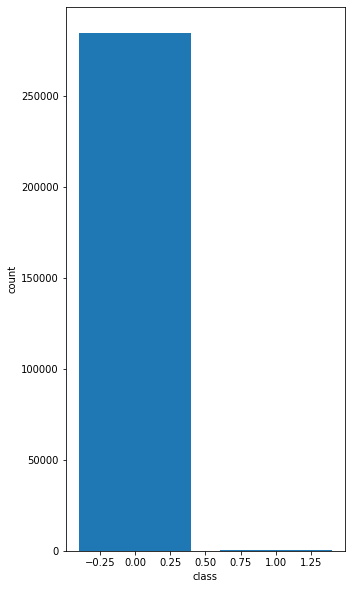

In [ ]:
plt.figure(figsize=(5, 10));
plt.bar(data.Class.value_counts().index,data.Class.value_counts().values)
plt.xlabel('class')
plt.ylabel('count');

## The data is severly imbalanced, to comat this I ill use the SMOTE oversampling techniue

In [ ]:
x= data.drop(labels=['Time', 'Class', 'Amount'], axis='columns')
y= data['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size=0.33, random_state=0,
                                                  shuffle=True, stratify=y)

In [ ]:
oversample = SMOTE()

In [ ]:
x_train_smote, y_train_smote = oversample.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
(y_train_smote==1).mean()

0.5

In [ ]:
input_dim = x.shape[1]

In [ ]:
model = Sequential(layers=[
        Dense(24, input_dim=input_dim, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy', keras.metrics.AUC()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                720       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,265
Trainable params: 1,265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(
    x = x_train_smote,
    y = y_train_smote,
    batch_size=16,
    epochs = 5,
    validation_split = 0.2
)

Epoch 1/5
19049/19049 [==============================] - 65s 3ms/step - loss: 0.0654 - accuracy: 0.9784 - auc_1: 0.9926 - val_loss: 0.0045 - val_accuracy: 0.9996 - val_auc_1: 0.0000e+00
Epoch 2/5
19049/19049 [==============================] - 62s 3ms/step - loss: 0.0087 - accuracy: 0.9977 - auc_1: 0.9997 - val_loss: 0.0020 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00
Epoch 3/5
19049/19049 [==============================] - 63s 3ms/step - loss: 0.0061 - accuracy: 0.9985 - auc_1: 0.9998 - val_loss: 0.0010 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00
Epoch 4/5
19049/19049 [==============================] - 63s 3ms/step - loss: 0.0047 - accuracy: 0.9989 - auc_1: 0.9998 - val_loss: 7.2064e-04 - val_accuracy: 1.0000 - val_auc_1: 0.0000e+00
Epoch 5/5
19049/19049 [==============================] - 63s 3ms/step - loss: 0.0044 - accuracy: 0.9989 - auc_1: 0.9998 - val_loss: 0.0032 - val_accuracy: 0.9991 - val_auc_1: 0.0000e+00


In [ ]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


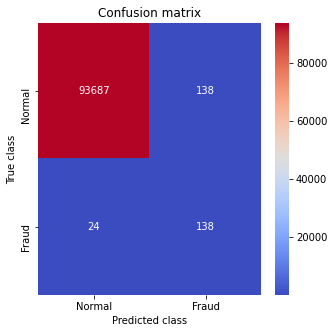

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=['Normal','Fraud'],
            yticklabels=['Normal','Fraud'], annot=True,
            fmt='d', cmap='coolwarm');
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
